In [30]:
# Import Necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [31]:
# load data
df = pd.read_csv(r'google_stock_dataset.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
1,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
3,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
4,8/26/2004,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
...,...,...,...,...,...,...,...
4425,3/18/2022,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4426,3/21/2022,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4427,3/22/2022,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4428,3/23/2022,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4430 non-null   object 
 1   Open       4430 non-null   float64
 2   High       4430 non-null   float64
 3   Low        4430 non-null   float64
 4   Close      4430 non-null   float64
 5   Adj Close  4430 non-null   float64
 6   Volume     4430 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [33]:
df.shape

(4430, 7)

In [34]:
# Set Date as index (optional)
df.set_index('Date', inplace=True)

In [35]:
#chech if there is null values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

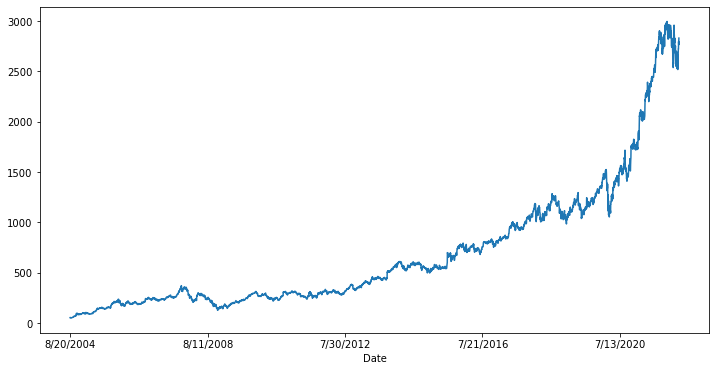

In [36]:
# Lets plot the target 'Close'
df['Close'].plot(figsize=(12,6))

In [37]:
# Define features (X) and target (y)
# X = df[["Open"]]
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, y_train.shape

((3544, 4), (3544,))

In [40]:
# Initialize the Linear Regression model
model = LinearRegression()

In [41]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Print model coeficients
model.coef_

array([-5.96494992e-01,  7.89329919e-01,  8.07779218e-01,  2.07193487e-09])

In [43]:
# Print model Intercept
model.intercept_

-0.00689956748556142

In [44]:
# Make predictions
y_pred = model.predict(X_test)
#y_pred

In [45]:
# Lets print actual and predicted price togother
_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
_df

,Actual,Predicted
Date,,
10/2/2014,580.880005,579.296603
12/24/2007,350.715729,349.543696
11/4/2020,1745.849976,1755.416257
6/19/2008,280.380371,279.635169
11/22/2005,208.443436,207.130791
...,...,...
6/4/2018,1153.040039,1153.266688
10/19/2018,1105.180054,1112.597307
5/15/2015,546.489990,544.516938


In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Model Evaluation:
Mean Squared Error (MSE): 32.63823105270754
Mean Absolute Error (MAE): 3.096674912762305
R-squared (R2): 0.9999278074097513


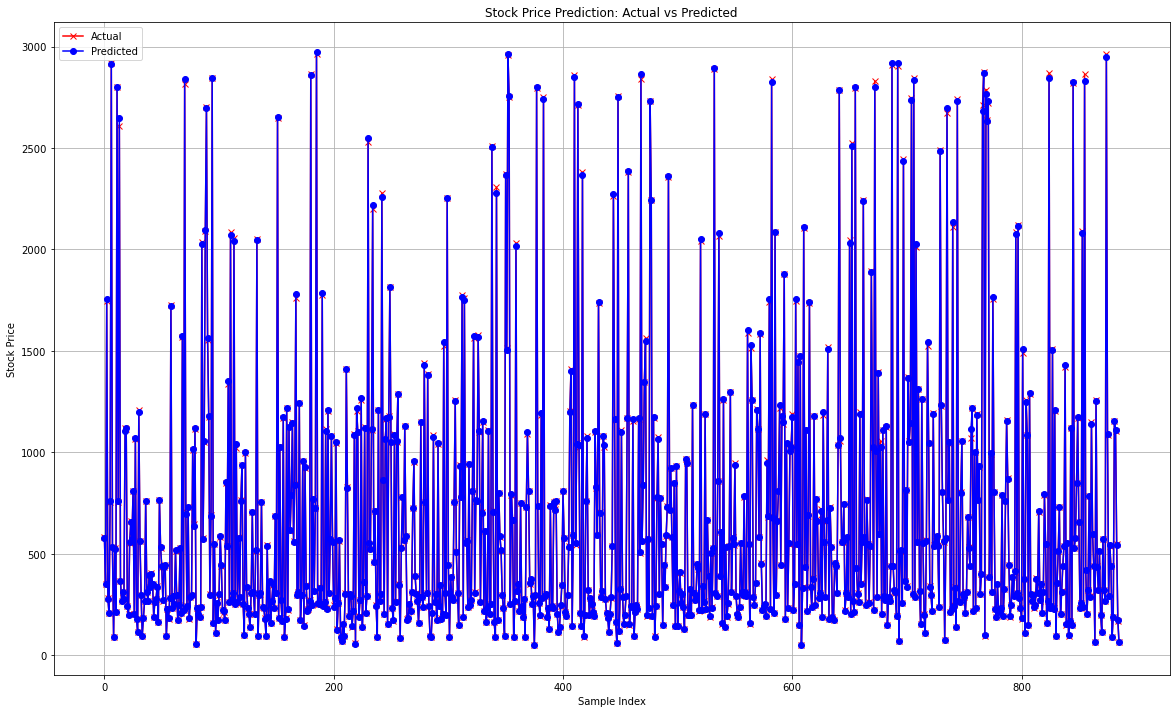

In [47]:
# Plot the predictions vs actual values
plt.figure(figsize=(20, 12))
plt.plot(y_test.values, label="Actual", marker='x', color='red')
plt.plot(y_pred, label="Predicted", marker='o', color='blue')
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

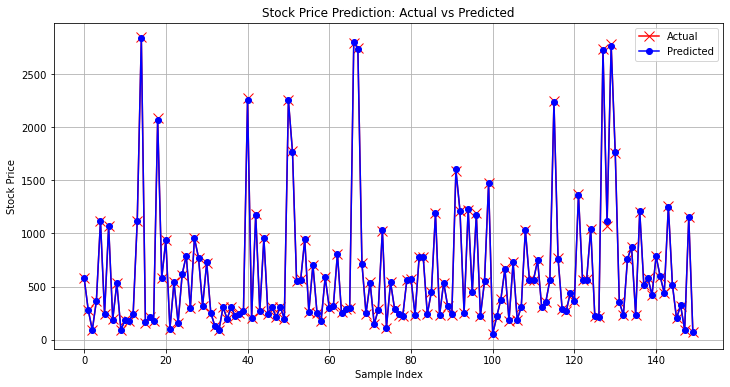

In [48]:
# Enhance the plot vision by taking data samples.

num_samples = 150

# Generate random indices without replacement
random_indices = np.random.choice(len(y_test.values), size=num_samples, replace=False)

# Take samples from both arrays using the same indices
test_sample = y_test.values[random_indices]
predicted_sample = y_pred[random_indices]

# Sort the samples by the random indices (optional for better visualization)
sorted_indices = np.argsort(random_indices)
test_sample = test_sample[sorted_indices]
predicted_sample = predicted_sample[sorted_indices]

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_sample, label="Actual", marker='x', color='red', ms=10)
plt.plot(predicted_sample, label="Predicted", marker='o', color='blue')
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

In [49]:
# Let's do some sample predictions
real_close_price =  50.220219
sample_input = [[50.050049, 52.082081, 48.028027, 44659096]]
#8/19/2004	50.050049	52.082081	48.028027	50.220219	50.220219	44659096

            
predicted_price = model.predict(sample_input)
print(f"Predicted Stock Price: {predicted_price[0]}")

Predicted Stock Price: 50.13701448040451
